In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import missingno as msno
import numpy as np
import seaborn as sns
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score, confusion_matrix
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import learning_curve
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.svm import SVC
from sklearn import metrics


data = pd.read_csv("C:/Users/Student01/scientificProject1/data/data.csv")
data

,speed,time,axis_x/Name,axis_x/Value,axis_y/Value,axis_y/Name,axis_z/Value,axis_z/Name,latitude,longitude,eco_type/Name,eco_type/Value
0,12,"May 29, 2022",Axis X,-513,-323,Axis Y,-1944,Axis Z,511055000,714309866,Green driving type,1.0
1,12,"May 29, 2022",Axis X,-513,-323,Axis Y,-1944,Axis Z,511055000,714309866,Green driving type,1.0
2,12,"May 29, 2022",Axis X,-513,-323,Axis Y,-1944,Axis Z,511055000,714309866,Green driving type,1.0
3,12,"May 29, 2022",Axis X,-513,-323,Axis Y,-1944,Axis Z,511055000,714309866,Green driving type,1.0
4,12,"May 29, 2022",Axis X,-513,-323,Axis Y,-1944,Axis Z,511055000,714309866,Green driving type,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...
544,10,"May 29, 2022",Axis X,-631,-370,Axis Y,-1912,Axis Z,510876500,714245050,Green driving type,1.0
545,14,"May 29, 2022",Axis X,-523,-326,Axis Y,-1803,Axis Z,510873966,714244866,NaN,NaN
546,9,"May 29, 2022",Axis X,-476,-335,Axis Y,-1836,Axis Z,510874050,714243850,NaN,NaN
547,10,"May 29, 2022",Axis X,-452,-326,Axis Y,-1860,Axis Z,510873933,714243599,NaN,NaN


# Data observing

In [2]:
data.shape
data = data.drop_duplicates()
data['eco_type/Value'].value_counts()

1.0    133
2.0      4
3.0      3
Name: eco_type/Value, dtype: int64

<AxesSubplot:>

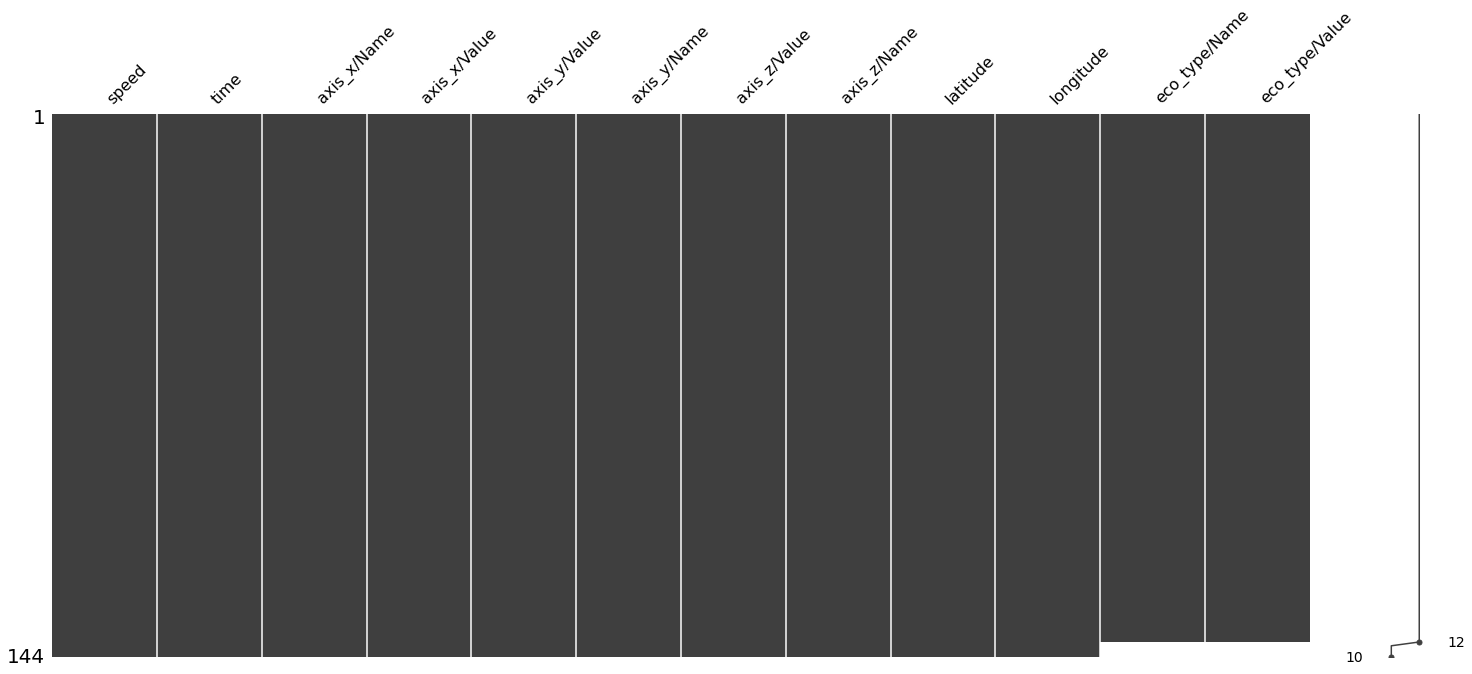

In [3]:
data.isna().sum()

msno.matrix(data)

In [4]:
# Delete Rows with Missing Values

data.dropna(inplace=True)
data.isna().sum()
data.shape

C:\Users\STUDEN~1\AppData\Local\Temp/ipykernel_12224/1602669212.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.dropna(inplace=True)


(140, 12)

In [5]:
data

,speed,time,axis_x/Name,axis_x/Value,axis_y/Value,axis_y/Name,axis_z/Value,axis_z/Name,latitude,longitude,eco_type/Name,eco_type/Value
0,12,"May 29, 2022",Axis X,-513,-323,Axis Y,-1944,Axis Z,511055000,714309866,Green driving type,1.0
20,17,"May 29, 2022",Axis X,-539,-320,Axis Y,-1906,Axis Z,511053383,714307866,Green driving type,1.0
40,17,"May 29, 2022",Axis X,-639,-320,Axis Y,-1906,Axis Z,511053383,714307866,Green driving type,2.0
41,17,"May 29, 2022",Axis X,-719,-320,Axis Y,-1906,Axis Z,511053383,714307866,Green driving type,2.0
42,17,"May 29, 2022",Axis X,-534,-320,Axis Y,-1906,Axis Z,511053383,714307866,Green driving type,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...
528,26,"May 29, 2022",Axis X,-568,-377,Axis Y,-1878,Axis Z,510883899,714248000,Green driving type,1.0
531,20,"May 29, 2022",Axis X,-460,-183,Axis Y,-1936,Axis Z,510879849,714246216,Green driving type,1.0
534,22,"May 29, 2022",Axis X,-421,-257,Axis Y,-2022,Axis Z,510879350,714245883,Green driving type,1.0
537,18,"May 29, 2022",Axis X,-695,-464,Axis Y,-1851,Axis Z,510878799,714245683,Green driving type,1.0


In [6]:
data["latitude"] = data["latitude"] / 10000000

C:\Users\STUDEN~1\AppData\Local\Temp/ipykernel_12224/1431647366.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data["latitude"] = data["latitude"] / 10000000


In [7]:
data["longitude"] = data["longitude"] / 10000000

C:\Users\STUDEN~1\AppData\Local\Temp/ipykernel_12224/1751549795.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data["longitude"] = data["longitude"] / 10000000


In [8]:
data

,speed,time,axis_x/Name,axis_x/Value,axis_y/Value,axis_y/Name,axis_z/Value,axis_z/Name,latitude,longitude,eco_type/Name,eco_type/Value
0,12,"May 29, 2022",Axis X,-513,-323,Axis Y,-1944,Axis Z,51.105500,71.430987,Green driving type,1.0
20,17,"May 29, 2022",Axis X,-539,-320,Axis Y,-1906,Axis Z,51.105338,71.430787,Green driving type,1.0
40,17,"May 29, 2022",Axis X,-639,-320,Axis Y,-1906,Axis Z,51.105338,71.430787,Green driving type,2.0
41,17,"May 29, 2022",Axis X,-719,-320,Axis Y,-1906,Axis Z,51.105338,71.430787,Green driving type,2.0
42,17,"May 29, 2022",Axis X,-534,-320,Axis Y,-1906,Axis Z,51.105338,71.430787,Green driving type,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...
528,26,"May 29, 2022",Axis X,-568,-377,Axis Y,-1878,Axis Z,51.088390,71.424800,Green driving type,1.0
531,20,"May 29, 2022",Axis X,-460,-183,Axis Y,-1936,Axis Z,51.087985,71.424622,Green driving type,1.0
534,22,"May 29, 2022",Axis X,-421,-257,Axis Y,-2022,Axis Z,51.087935,71.424588,Green driving type,1.0
537,18,"May 29, 2022",Axis X,-695,-464,Axis Y,-1851,Axis Z,51.087880,71.424568,Green driving type,1.0


In [9]:
freq_class_driver = data['eco_type/Value'].value_counts()
type(freq_class_driver)
class_dict = freq_class_driver.to_dict()
class_dict

{1.0: 133, 2.0: 4, 3.0: 3}

In [10]:
# Max Acceleration, Max Braking or Max Cornering

In [11]:
class_dict['Max acceleration'] = class_dict.pop(1.0)
class_dict['Max cornering'] = class_dict.pop(3.0)
class_dict['Max braking'] = class_dict.pop(2.0)

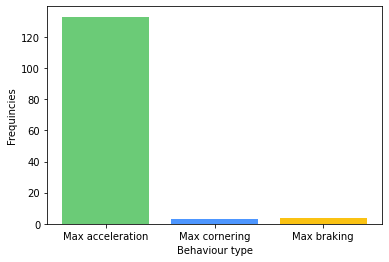

In [12]:
classes = list(class_dict.keys())
values = list(class_dict.values())
color = ['#6BCB77', '#4D96FF', '#FAC213']
plt.xlabel("Behaviour type")
plt.ylabel("Frequincies")
plt.bar(range(len(class_dict)), values, tick_label=classes, color=color)
plt.show()

In [13]:
# Delete unnecessary data in text format

In [14]:
data_upd = data.drop(columns=['time', 'axis_x/Name', 'axis_y/Name', 'axis_z/Name', 'eco_type/Name'])

In [15]:
data_upd

,speed,axis_x/Value,axis_y/Value,axis_z/Value,latitude,longitude,eco_type/Value
0,12,-513,-323,-1944,51.105500,71.430987,1.0
20,17,-539,-320,-1906,51.105338,71.430787,1.0
40,17,-639,-320,-1906,51.105338,71.430787,2.0
41,17,-719,-320,-1906,51.105338,71.430787,2.0
42,17,-534,-320,-1906,51.105338,71.430787,2.0
...,...,...,...,...,...,...,...
528,26,-568,-377,-1878,51.088390,71.424800,1.0
531,20,-460,-183,-1936,51.087985,71.424622,1.0
534,22,-421,-257,-2022,51.087935,71.424588,1.0
537,18,-695,-464,-1851,51.087880,71.424568,1.0


# Defining outliers on values 

In [16]:
fig = plt.figure(figsize =(10, 7))

<Figure size 720x504 with 0 Axes>

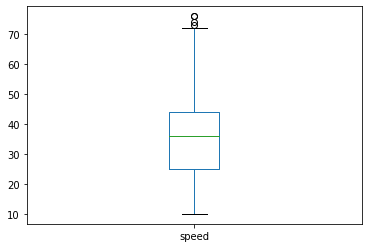

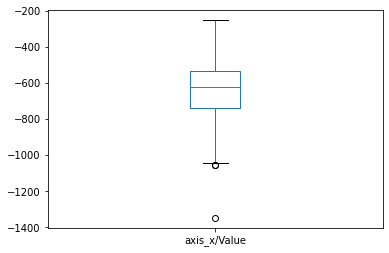

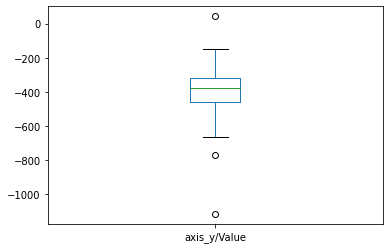

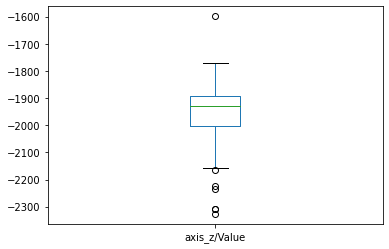

In [17]:
def plot_boxplot(data, ft):
    data.boxplot(column=[ft])
    plt.grid(False)
    plt.show()

plot_boxplot(data_upd, "speed")
plot_boxplot(data_upd, "axis_x/Value")
plot_boxplot(data_upd, "axis_y/Value")
plot_boxplot(data_upd, "axis_z/Value")

In [18]:
# Remove outliers
# IQR method
# IQR = Q3 - Q1
# +/- 1.5 * IQR

def outliers(data, ft):
    Q1 = data[ft].quantile(0.25)
    Q3 = data[ft].quantile(0.75)
    IQR = Q3 - Q1

    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

# indexes of outliers
    ls = data.index[ (data[ft] < lower_bound) | (data[ft] > upper_bound)]
    return ls

In [19]:
index_list = []
for feature in ['speed', 'axis_x/Value', 'axis_y/Value', 'axis_z/Value']:
    index_list.extend(outliers(data_upd, feature))
print("Indexes of outliers: ", index_list)
print(len(index_list))

Indexes of outliers:  [461, 462, 463, 464, 304, 311, 475, 459, 472, 473, 269, 461, 469, 470, 471, 484, 490]
17


In [20]:
# define a function called "remove" which returns a cleaned dataframe without outliers

def remove(data, ls):
    ls = sorted(set(ls))
    data = data.drop(ls)
    return data

In [21]:
data_cleaned = remove(data_upd, index_list)
print("Before removing outliers: ", data.shape)
print("After removing outliers: ", data_cleaned.shape)

Before removing outliers:  (140, 12)
After removing outliers:  (124, 7)


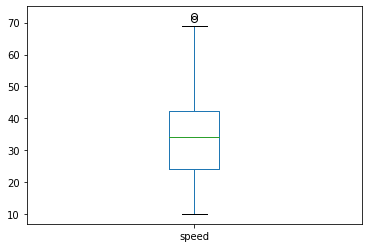

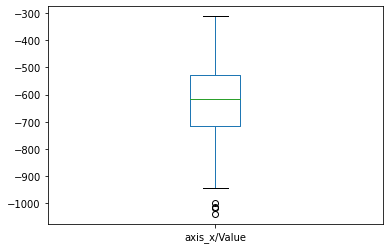

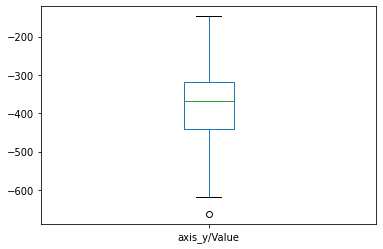

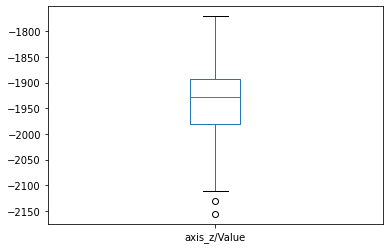

In [22]:
plot_boxplot(data_cleaned, "speed")
plot_boxplot(data_cleaned, "axis_x/Value")
plot_boxplot(data_cleaned, "axis_y/Value")
plot_boxplot(data_cleaned, "axis_z/Value")

In [23]:
index_list_2 = []
for feature in ['speed', 'axis_x/Value', 'axis_y/Value', 'axis_z/Value']:
    index_list_2.extend(outliers(data_cleaned, feature))
print("Indexes of outliers: ", index_list_2)

Indexes of outliers:  [460, 466, 274, 284, 317, 361, 525, 299, 487]


In [24]:
data_cleaned_upd = remove(data_cleaned, index_list_2)
print("Before second stage removing outliers: ", data_cleaned.shape)
print("After removing all outliers: ", data_cleaned_upd.shape)

Before second stage removing outliers:  (124, 7)
After removing all outliers:  (115, 7)


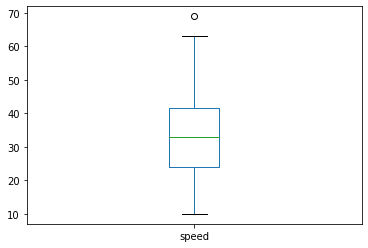

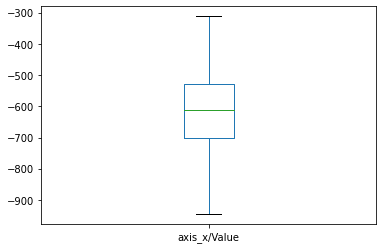

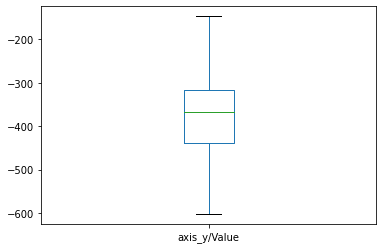

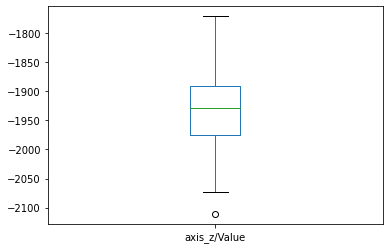

In [25]:
plot_boxplot(data_cleaned_upd, "speed")
plot_boxplot(data_cleaned_upd, "axis_x/Value")
plot_boxplot(data_cleaned_upd, "axis_y/Value")
plot_boxplot(data_cleaned_upd, "axis_z/Value")

# Balancing unbalanced data

In [26]:
X = data_upd.drop(['eco_type/Value'], axis=1)
y = data_upd['eco_type/Value']
print(X)
print(y)

     speed  axis_x/Value  axis_y/Value  axis_z/Value   latitude  longitude
0       12          -513          -323         -1944  51.105500  71.430987
20      17          -539          -320         -1906  51.105338  71.430787
40      17          -639          -320         -1906  51.105338  71.430787
41      17          -719          -320         -1906  51.105338  71.430787
42      17          -534          -320         -1906  51.105338  71.430787
..     ...           ...           ...           ...        ...        ...
528     26          -568          -377         -1878  51.088390  71.424800
531     20          -460          -183         -1936  51.087985  71.424622
534     22          -421          -257         -2022  51.087935  71.424588
537     18          -695          -464         -1851  51.087880  71.424568
541     10          -631          -370         -1912  51.087650  71.424505

[140 rows x 6 columns]
0      1.0
20     1.0
40     2.0
41     2.0
42     2.0
      ... 
528    1.0

In [27]:
X

,speed,axis_x/Value,axis_y/Value,axis_z/Value,latitude,longitude
0,12,-513,-323,-1944,51.105500,71.430987
20,17,-539,-320,-1906,51.105338,71.430787
40,17,-639,-320,-1906,51.105338,71.430787
41,17,-719,-320,-1906,51.105338,71.430787
42,17,-534,-320,-1906,51.105338,71.430787
...,...,...,...,...,...,...
528,26,-568,-377,-1878,51.088390,71.424800
531,20,-460,-183,-1936,51.087985,71.424622
534,22,-421,-257,-2022,51.087935,71.424588
537,18,-695,-464,-1851,51.087880,71.424568


In [28]:
# Random Forest Classifier for checking
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.33, random_state = 42)
X_train.shape, X_test.shape

((93, 6), (47, 6))

In [29]:
batch_size = 128
num_epochs = 10
rfc = RandomForestClassifier(random_state=0)
rfc.fit(X_train, y_train)
y_pred = rfc.predict(X_test)

In [30]:
print('Model accuracy score with 10 decision-trees : {0:0.4f}'. format(accuracy_score(y_test, y_pred)))

Model accuracy score with 10 decision-trees : 0.9362


rfc_2 = RandomForestClassifier(n_estimators=100, random_state=0)
rfc_2.fit(X_train, y_train)
y_pred_2 = rfc_2.predict(X_test)
print('Model accuracy score with 100 decision-trees : {0:0.4f}'. format(accuracy_score(y_test, y_pred)))

In [31]:
# Handling imbalanced data with over-sampling

class_3, class_2, class_1 = data_upd['eco_type/Value'].value_counts()
c3 = data_upd[data_upd['eco_type/Value'] == 1.0]
c2 = data_upd[data_upd['eco_type/Value'] == 3.0]
c1 = data_upd[data_upd['eco_type/Value'] == 2.0]
df_3 = c3.sample(class_1)
df_2 = c2.sample(class_1)

df_1 = c1.sample(class_3, replace=True)
df_2_over = c2.sample(class_3, replace=True)

In [32]:
oversampled_df = pd.concat([c3,df_1,df_2_over], axis=0)

In [33]:
oversampled_df['eco_type/Value'].value_counts()

2.0    133
3.0    133
1.0    133
Name: eco_type/Value, dtype: int64

In [34]:
oversampled_df.shape

(399, 7)

C:\Users\Student01\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='eco_type/Value', ylabel='count'>

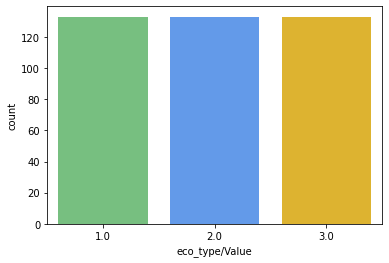

In [35]:
color = ['#6BCB77', '#4D96FF', '#FAC213']

sns.countplot('eco_type/Value', data=oversampled_df, palette=color)

In [36]:
oversampled_df

,speed,axis_x/Value,axis_y/Value,axis_z/Value,latitude,longitude,eco_type/Value
0,12,-513,-323,-1944,51.105500,71.430987,1.0
20,17,-539,-320,-1906,51.105338,71.430787,1.0
44,21,-489,-373,-1953,51.105240,71.430672,1.0
64,13,-664,-397,-1885,51.105058,71.430555,1.0
84,17,-478,-562,-1999,51.104758,71.430820,1.0
...,...,...,...,...,...,...,...
473,30,-940,-771,-1848,51.091193,71.425507,3.0
470,66,-543,-531,-2310,51.091732,71.425725,3.0
500,38,-586,-340,-1989,51.090203,71.425187,3.0
470,66,-543,-531,-2310,51.091732,71.425725,3.0


In [37]:
oversampled_df["axis_x/Value"] = oversampled_df["axis_x/Value"] / 100
oversampled_df["axis_y/Value"] = oversampled_df["axis_y/Value"] / 100
oversampled_df["axis_z/Value"] = oversampled_df["axis_z/Value"] / 100

oversampled_df

,speed,axis_x/Value,axis_y/Value,axis_z/Value,latitude,longitude,eco_type/Value
0,12,-5.13,-3.23,-19.44,51.105500,71.430987,1.0
20,17,-5.39,-3.20,-19.06,51.105338,71.430787,1.0
44,21,-4.89,-3.73,-19.53,51.105240,71.430672,1.0
64,13,-6.64,-3.97,-18.85,51.105058,71.430555,1.0
84,17,-4.78,-5.62,-19.99,51.104758,71.430820,1.0
...,...,...,...,...,...,...,...
473,30,-9.40,-7.71,-18.48,51.091193,71.425507,3.0
470,66,-5.43,-5.31,-23.10,51.091732,71.425725,3.0
500,38,-5.86,-3.40,-19.89,51.090203,71.425187,3.0
470,66,-5.43,-5.31,-23.10,51.091732,71.425725,3.0


In [38]:
oversampled_df = oversampled_df.drop(columns=["speed", "latitude", "longitude"], axis=1)
oversampled_df

,axis_x/Value,axis_y/Value,axis_z/Value,eco_type/Value
0,-5.13,-3.23,-19.44,1.0
20,-5.39,-3.20,-19.06,1.0
44,-4.89,-3.73,-19.53,1.0
64,-6.64,-3.97,-18.85,1.0
84,-4.78,-5.62,-19.99,1.0
...,...,...,...,...
473,-9.40,-7.71,-18.48,3.0
470,-5.43,-5.31,-23.10,3.0
500,-5.86,-3.40,-19.89,3.0
470,-5.43,-5.31,-23.10,3.0


# Feature Scalling / Normalizing

In [39]:
scaler = MinMaxScaler()
oversampled_df[["axis_x/Value", "axis_y/Value", "axis_z/Value"]] = scaler.fit_transform(oversampled_df[["axis_x/Value", "axis_y/Value", "axis_z/Value"]])

In [40]:
oversampled_df

,axis_x/Value,axis_y/Value,axis_z/Value,eco_type/Value
0,0.762774,0.683938,0.526099,1.0
20,0.739051,0.686528,0.578297,1.0
44,0.784672,0.640760,0.513736,1.0
64,0.625000,0.620035,0.607143,1.0
84,0.794708,0.477547,0.450549,1.0
...,...,...,...,...
473,0.373175,0.297064,0.657967,3.0
470,0.735401,0.504318,0.023352,3.0
500,0.696168,0.669257,0.464286,3.0
470,0.735401,0.504318,0.023352,3.0


In [41]:
dataset = oversampled_df.to_numpy()

In [42]:
X_l = oversampled_df.iloc[:, :-1]
y_l = oversampled_df.iloc[:, -1]

In [43]:
group_1 = oversampled_df.loc[y == '1.0']
group_2 = oversampled_df.loc[y == '2.0']
group_3 = oversampled_df.loc[y == '3.0']

In [44]:
X_u = oversampled_df.drop(columns=['eco_type/Value'], axis=1)
y_u = oversampled_df['eco_type/Value']
print(y_u)

0      1.0
20     1.0
44     1.0
64     1.0
84     1.0
      ... 
473    3.0
470    3.0
500    3.0
470    3.0
500    3.0
Name: eco_type/Value, Length: 399, dtype: float64


In [45]:
X_train, X_test, y_train, y_test = train_test_split(X_u, y_u, test_size = 0.33, random_state = 42, shuffle=True)
X_train.shape, X_test.shape

((267, 3), (132, 3))

# Classifications / Logistic regression

In [46]:
logreg = LogisticRegression(max_iter=1700)
logreg.fit(X_train, y_train)
y_pred = logreg.predict(X_test)
print('Model accuracy score: {0:0.4f}'. format(accuracy_score(y_test, y_pred)))

Model accuracy score: 0.6212


In [47]:
y_pred_train = logreg.predict(X_train)
y_pred_train

array([3., 2., 2., 2., 2., 3., 2., 1., 1., 2., 1., 2., 2., 2., 2., 1., 2.,
       2., 2., 1., 3., 2., 1., 3., 3., 2., 2., 2., 1., 2., 2., 2., 1., 2.,
       2., 2., 1., 2., 2., 2., 3., 2., 1., 3., 2., 1., 2., 3., 2., 2., 2.,
       2., 3., 3., 3., 2., 2., 2., 2., 2., 3., 2., 3., 2., 2., 1., 2., 3.,
       1., 2., 3., 2., 2., 1., 1., 2., 2., 3., 2., 3., 3., 2., 3., 1., 3.,
       3., 1., 2., 3., 2., 2., 2., 2., 3., 1., 2., 1., 2., 1., 2., 2., 3.,
       2., 3., 1., 3., 3., 3., 2., 3., 3., 1., 3., 2., 2., 2., 2., 2., 2.,
       1., 2., 3., 2., 3., 2., 2., 2., 2., 1., 3., 2., 2., 2., 3., 3., 2.,
       2., 2., 2., 3., 1., 2., 2., 1., 2., 2., 3., 3., 2., 1., 2., 2., 1.,
       2., 2., 1., 2., 1., 3., 2., 3., 2., 3., 1., 1., 2., 2., 3., 2., 1.,
       2., 2., 2., 2., 2., 2., 1., 3., 2., 2., 3., 1., 2., 3., 3., 2., 2.,
       2., 3., 3., 2., 1., 1., 1., 3., 2., 2., 3., 2., 2., 3., 2., 3., 2.,
       2., 2., 1., 2., 3., 2., 2., 1., 3., 3., 2., 2., 1., 3., 2., 3., 2.,
       3., 3., 2., 1., 3.

In [48]:
print('Training-set accuracy score: {0:0.4f}'. format(accuracy_score(y_train, y_pred_train)))

Training-set accuracy score: 0.6479


In [49]:
# Check for overfitting and underfitting
print('Training set score: {:.4f}'.format(logreg.score(X_train, y_train)))
print('Test set score: {:.4f}'.format(logreg.score(X_test, y_test)))

Training set score: 0.6479
Test set score: 0.6212


In [50]:
cm = confusion_matrix(y_test, y_pred)
print('Confusion matrix\n\n', cm)
print('\nTrue Positives(TP) = ', cm[0,0])
print('\nTrue Negatives(TN) = ', cm[1,1])
print('\nFalse Positives(FP) = ', cm[0,1])
print('\nFalse Negatives(FN) = ', cm[1,0])

Confusion matrix

 [[10 36  6]
 [ 0 34  0]
 [ 8  0 38]]

True Positives(TP) =  10

True Negatives(TN) =  34

False Positives(FP) =  36

False Negatives(FN) =  0


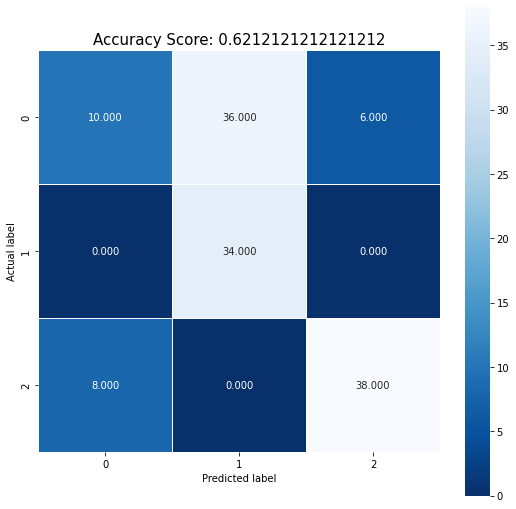

In [51]:
plt.figure(figsize=(9,9))
sns.heatmap(cm, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Accuracy Score: {0}'.format(accuracy_score(y_test, y_pred))
plt.title(all_sample_title, size = 15);

# KNN implementation

In [52]:
neighbors = np.arange(1,9)
train_accuracy =np.empty(len(neighbors))
test_accuracy = np.empty(len(neighbors))

for i,k in enumerate(neighbors):
    #Setup a knn classifier with k neighbors
    knn = KNeighborsClassifier(n_neighbors=k)
    
    knn.fit(X_train, y_train)
    train_accuracy[i] = knn.score(X_train, y_train)
    test_accuracy[i] = knn.score(X_test, y_test) 

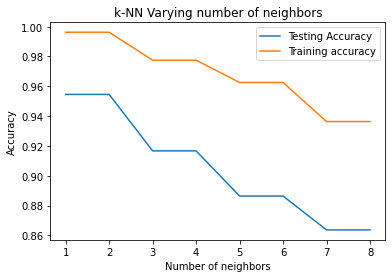

In [53]:
plt.title('k-NN Varying number of neighbors')
plt.plot(neighbors, test_accuracy, label='Testing Accuracy')
plt.plot(neighbors, train_accuracy, label='Training accuracy')
plt.legend()
plt.xlabel('Number of neighbors')
plt.ylabel('Accuracy')
plt.show()

In [54]:
train_accuracy

array([0.99625468, 0.99625468, 0.97752809, 0.97752809, 0.96254682,
       0.96254682, 0.93632959, 0.93632959])

In [55]:
test_accuracy

array([0.95454545, 0.95454545, 0.91666667, 0.91666667, 0.88636364,
       0.88636364, 0.86363636, 0.86363636])

In [56]:
# KNN with neighbours = 3

knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
print('Model KNN with n = 3 accuracy score: {0:0.4f}'. format(accuracy_score(y_test, y_pred)))

Model KNN with n = 3 accuracy score: 0.9167


In [57]:
print('Training set score: {:.4f}'.format(knn.score(X_train, y_train)))

print('Test set score: {:.4f}'.format(knn.score(X_test, y_test)))

Training set score: 0.9775
Test set score: 0.9167


In [58]:
cm = confusion_matrix(y_test, y_pred)
print('Confusion matrix\n\n', cm)
print('\nTrue Positives(TP) = ', cm[0,0])
print('\nTrue Negatives(TN) = ', cm[1,1])
print('\nFalse Positives(FP) = ', cm[0,1])
print('\nFalse Negatives(FN) = ', cm[1,0])

Confusion matrix

 [[41  7  4]
 [ 0 34  0]
 [ 0  0 46]]

True Positives(TP) =  41

True Negatives(TN) =  34

False Positives(FP) =  7

False Negatives(FN) =  0


# Decision tree

In [59]:
#Check overfitting or underfitting
values = [i for i in range(1, 31)]
train_scores = []
test_scores = []
for i in values:
 # configure the model
 model = DecisionTreeClassifier(max_depth=i)
 # fit model on the training dataset
 model.fit(X_train, y_train)
 # evaluate on the train dataset
 train_yhat = model.predict(X_train)
 train_acc = accuracy_score(y_train, train_yhat)
 train_scores.append(train_acc)
 # evaluate on the test dataset
 test_yhat = model.predict(X_test)
 test_acc = accuracy_score(y_test, test_yhat)
 test_scores.append(test_acc)
 # summarize progress
 print('>%d, train: %.3f, test: %.3f' % (i, train_acc, test_acc))

>1, train: 0.697, test: 0.606
>2, train: 0.835, test: 0.871
>3, train: 0.959, test: 0.879
>4, train: 0.978, test: 0.902
>5, train: 0.981, test: 0.902
>6, train: 0.985, test: 0.902
>7, train: 0.985, test: 0.902
>8, train: 0.996, test: 0.924
>9, train: 0.996, test: 0.939
>10, train: 0.996, test: 0.924
>11, train: 0.996, test: 0.917
>12, train: 0.996, test: 0.947
>13, train: 0.996, test: 0.947
>14, train: 0.996, test: 0.955
>15, train: 0.996, test: 0.917
>16, train: 0.996, test: 0.932
>17, train: 0.996, test: 0.909
>18, train: 0.996, test: 0.939
>19, train: 0.996, test: 0.955
>20, train: 0.996, test: 0.917
>21, train: 0.996, test: 0.924
>22, train: 0.996, test: 0.939
>23, train: 0.996, test: 0.924
>24, train: 0.996, test: 0.939
>25, train: 0.996, test: 0.917
>26, train: 0.996, test: 0.932
>27, train: 0.996, test: 0.909
>28, train: 0.996, test: 0.932
>29, train: 0.996, test: 0.932
>30, train: 0.996, test: 0.932


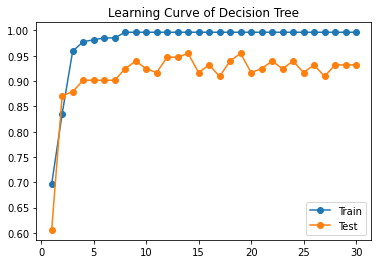

In [60]:
plt.title('Learning Curve of Decision Tree')
plt.plot(values, train_scores, '-o', label='Train')
plt.plot(values, test_scores, '-o', label='Test')
plt.legend()
plt.show()

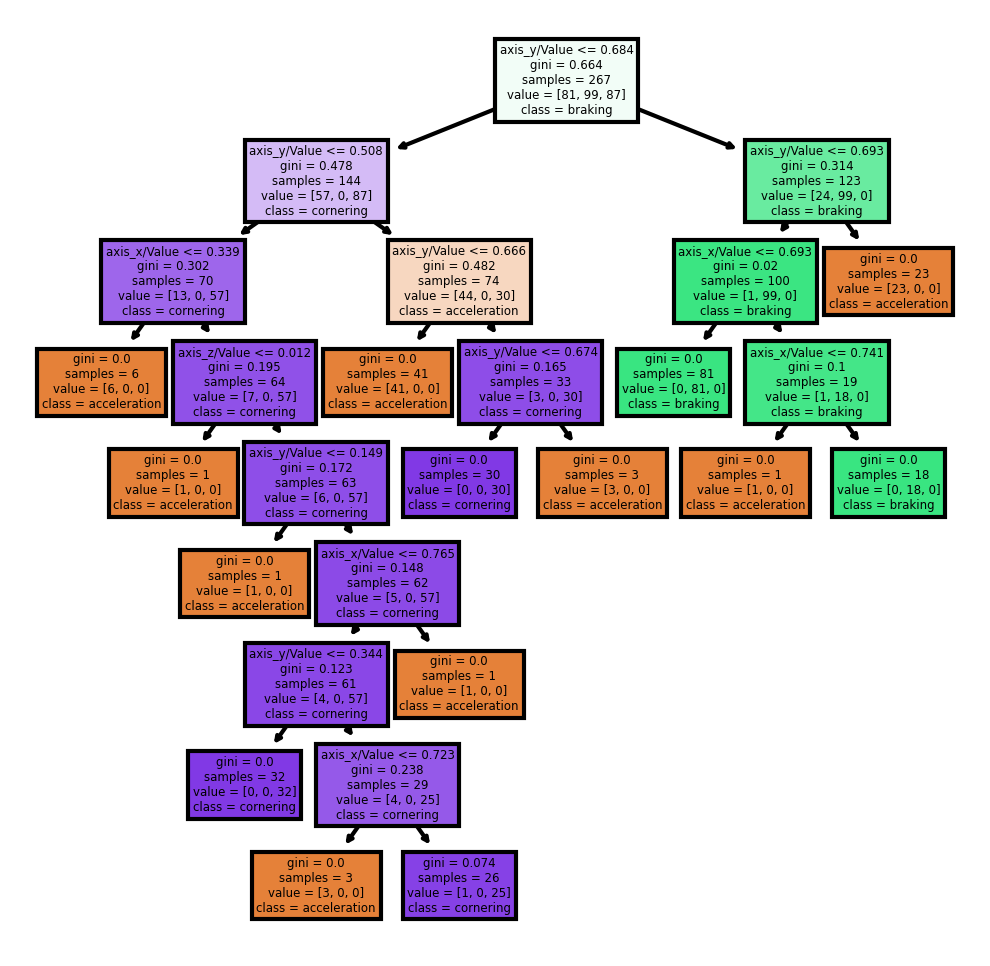

In [61]:
# Tree visualization
clf = tree.DecisionTreeClassifier()
clf = clf.fit(X_train, y_train)
fn=['axis_x/Value','axis_y/Value','axis_z/Value', 'speed', 'latitude', 'longitude']
cn=['acceleration', 'braking', 'cornering']
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (4,4), dpi=300)
tree.plot_tree(clf,
               feature_names = fn, 
               class_names=cn,
               filled = True);
fig.savefig('imagename.png')

# SVM classification

In [62]:
accuracy_list = []
svc = SVC()
svc.fit(X_train,y_train)
y_pred = svc.predict(X_test)
accuracy_list.append(accuracy_score(y_test,y_pred))
print('Accuracy Score in SVM model:')
print(metrics.accuracy_score(y_test,y_pred))

Accuracy Score in SVM model:
0.8257575757575758


In [63]:
svc = SVC(kernel ='linear')
svc.fit(X_train,y_train)
y_pred = svc.predict(X_test)
accuracy_list.append(accuracy_score(y_test,y_pred))
print('Accuracy Score:')
print(metrics.accuracy_score(y_test,y_pred))
print(accuracy_list)

Accuracy Score:
0.5833333333333334
[0.8257575757575758, 0.5833333333333334]


In [64]:
svc = SVC(kernel='rbf')
svc.fit(X_train,y_train)
y_pred = svc.predict(X_test)
accuracy_list.append(accuracy_score(y_test,y_pred))
print('Accuracy Score:')
print(metrics.accuracy_score(y_test,y_pred))

Accuracy Score:
0.8257575757575758


In [65]:
svc = SVC(kernel='poly')
svc.fit(X_train,y_train)
y_pred = svc.predict(X_test)
accuracy_list.append(accuracy_score(y_test,y_pred))
print('Accuracy Score:')
print(metrics.accuracy_score(y_test,y_pred))

Accuracy Score:
0.8636363636363636


In [66]:
print(accuracy_list)

[0.8257575757575758, 0.5833333333333334, 0.8257575757575758, 0.8636363636363636]


In [67]:
cm = confusion_matrix(y_test, y_pred)
print('Confusion matrix\n\n', cm)
print('\nTrue Positives(TP) = ', cm[0,0])
print('\nTrue Negatives(TN) = ', cm[1,1])
print('\nFalse Positives(FP) = ', cm[0,1])
print('\nFalse Negatives(FN) = ', cm[1,0])

Confusion matrix

 [[34  5 13]
 [ 0 34  0]
 [ 0  0 46]]

True Positives(TP) =  34

True Negatives(TN) =  34

False Positives(FP) =  5

False Negatives(FN) =  0


# Random Forest Classification

In [68]:
# With default number of trees

rfc = RandomForestClassifier(random_state=0)
rfc.fit(X_train, y_train)
y_pred = rfc.predict(X_test)
print('Model accuracy score with 10 decision-trees : {0:0.4f}'. format(accuracy_score(y_test, y_pred)))

Model accuracy score with 10 decision-trees : 0.9848


In [69]:
# With 100 Decision trees

rfc_100 = RandomForestClassifier(n_estimators=100, random_state=0)
rfc_100.fit(X_train, y_train)
y_pred_100 = rfc_100.predict(X_test)
print('Model accuracy score with 100 decision-trees : {0:0.4f}'. format(accuracy_score(y_test, y_pred_100)))

Model accuracy score with 100 decision-trees : 0.9848


In [70]:
# With 20 Decision trees

rfc_20 = RandomForestClassifier(n_estimators=20, random_state=0)
rfc_20.fit(X_train, y_train)
y_pred_20 = rfc_20.predict(X_test)
print('Model accuracy score with 20 decision-trees : {0:0.4f}'. format(accuracy_score(y_test, y_pred_20)))

Model accuracy score with 20 decision-trees : 0.9773


In [71]:
rfc_150 = RandomForestClassifier(n_estimators=150, random_state=0)
rfc_150.fit(X_train, y_train)
y_pred_150 = rfc_150.predict(X_test)
print('Model accuracy score with 150 decision-trees : {0:0.4f}'. format(accuracy_score(y_test, y_pred_150
                                                                                      )))

Model accuracy score with 150 decision-trees : 0.9848


In [72]:
cm = confusion_matrix(y_test, y_pred_150)
print('Confusion matrix\n\n', cm)
print('\nTrue Positives(TP) = ', cm[0,0])
print('\nTrue Negatives(TN) = ', cm[1,1])
print('\nFalse Positives(FP) = ', cm[0,1])
print('\nFalse Negatives(FN) = ', cm[1,0])

Confusion matrix

 [[50  1  1]
 [ 0 34  0]
 [ 0  0 46]]

True Positives(TP) =  50

True Negatives(TN) =  34

False Positives(FP) =  1

False Negatives(FN) =  0


Features important

In [73]:
importances = rfc_100.feature_importances_
sorted_indices = np.argsort(importances)[::-1]

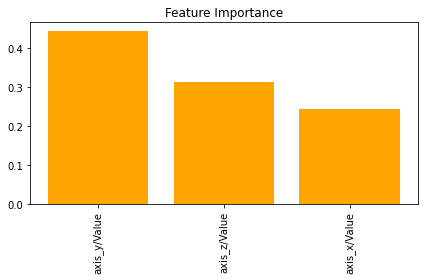

In [74]:
plt.title('Feature Importance')
plt.bar(range(X_train.shape[1]), importances[sorted_indices], align='center', color="orange")
plt.xticks(range(X_train.shape[1]), X_train.columns[sorted_indices], rotation=90)
plt.tight_layout()
plt.show()